In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use('fivethirtyeight')
%matplotlib inline


In [3]:
import yfinance as yf
import datetime as dt
stock = "AMZN"
start = dt.datetime( 2000, 1, 1)
end = dt.datetime( 2025, 8, 13)
df = yf.download(stock, start, end)

/tmp/ipython-input-2544288495.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,
2000-01-03,4.468750,4.478125,3.952344,4.075000,322352000
2000-01-04,4.096875,4.575000,4.087500,4.268750,349748000
2000-01-05,3.487500,3.756250,3.400000,3.525000,769148000
2000-01-06,3.278125,3.634375,3.200000,3.565625,375040000
2000-01-07,3.478125,3.525000,3.309375,3.350000,210108000


In [5]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,
2025-08-06,222.309998,222.649994,213.740005,214.699997,54823000
2025-08-07,223.130005,226.220001,220.820007,221.000000,40603500
2025-08-08,222.690002,223.800003,221.880005,223.139999,32970500
2025-08-11,221.300003,223.050003,220.399994,221.779999,31646200
2025-08-12,221.470001,223.500000,219.050003,222.229996,37185800


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6441 entries, 2000-01-03 to 2025-08-12
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AMZN)   6441 non-null   float64
 1   (High, AMZN)    6441 non-null   float64
 2   (Low, AMZN)     6441 non-null   float64
 3   (Open, AMZN)    6441 non-null   float64
 4   (Volume, AMZN)  6441 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 301.9 KB


**Check Missing Value**

In [8]:
df.isnull().sum()

,,0
Price,Ticker,
Close,AMZN,0
High,AMZN,0
Low,AMZN,0
Open,AMZN,0
Volume,AMZN,0


In [9]:
df = df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AMZN,AMZN,AMZN,AMZN,AMZN
0,2000-01-03,4.468750,4.478125,3.952344,4.075000,322352000
1,2000-01-04,4.096875,4.575000,4.087500,4.268750,349748000
2,2000-01-05,3.487500,3.756250,3.400000,3.525000,769148000
3,2000-01-06,3.278125,3.634375,3.200000,3.565625,375040000
4,2000-01-07,3.478125,3.525000,3.309375,3.350000,210108000


In [14]:
df.columns

MultiIndex([(  'Date',     ''),
            ( 'Close', 'AMZN'),
            (  'High', 'AMZN'),
            (   'Low', 'AMZN'),
            (  'Open', 'AMZN'),
            ('Volume', 'AMZN')],
           names=['Price', 'Ticker'])

In [16]:
data01 = df.to_csv('AMZN.csv')
data01 = pd.read_csv('AMZN.csv')
data01.head()

,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,AMZN,AMZN,AMZN,AMZN,AMZN
1,0,2000-01-03,4.46875,4.478125095367432,3.9523439407348633,4.074999809265137,322352000
2,1,2000-01-04,4.096875190734863,4.574999809265137,4.087500095367432,4.268750190734863,349748000
3,2,2000-01-05,3.487499952316284,3.7562499046325684,3.4000000953674316,3.5250000953674316,769148000
4,3,2000-01-06,3.278125047683716,3.6343750953674316,3.200000047683716,3.565624952316284,375040000


In [20]:
#Candel Sticks
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=data01['Date'],
                open=data01['Open'],
                high=data01['High'],
                low=data01['Low'],
                close=data01['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [22]:
df = df.drop (['Date'], axis = 1)

/tmp/ipython-input-795924965.py:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [23]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
0,4.468750,4.478125,3.952344,4.075000,322352000
1,4.096875,4.575000,4.087500,4.268750,349748000
2,3.487500,3.756250,3.400000,3.525000,769148000
3,3.278125,3.634375,3.200000,3.565625,375040000
4,3.478125,3.525000,3.309375,3.350000,210108000


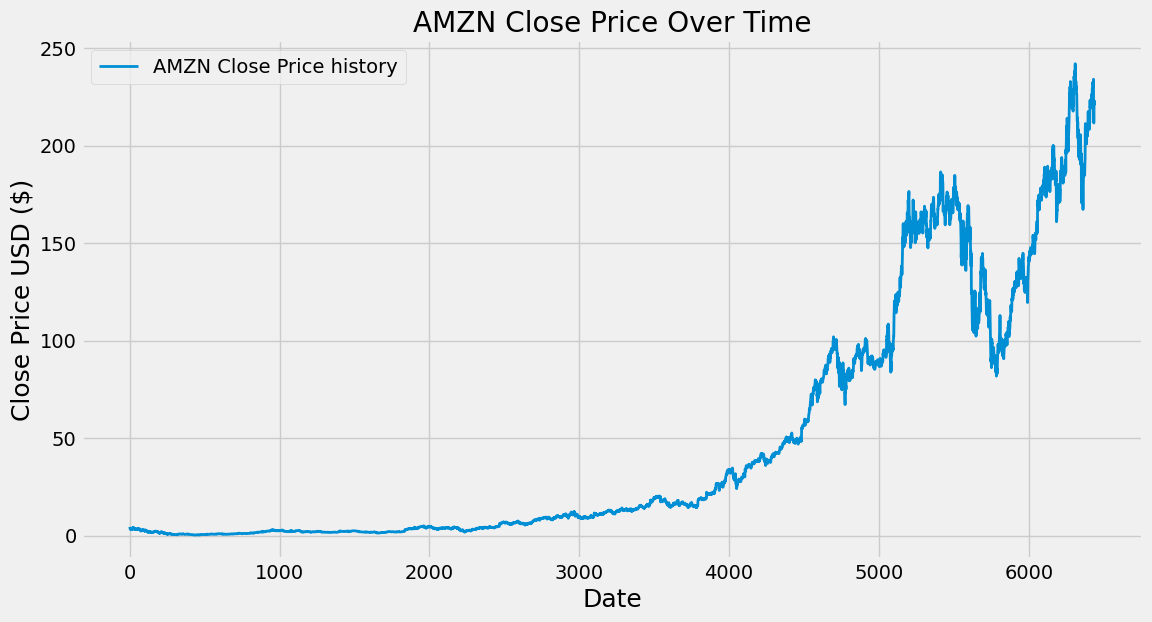

In [24]:
plt.figure(figsize = (12.2, 6.4))
plt.plot(df['Close'], label = f'{stock} Close Price history', linewidth = 2)
plt.title(f'{stock} Close Price Over Time')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.legend(loc = 'upper left')
plt.show()


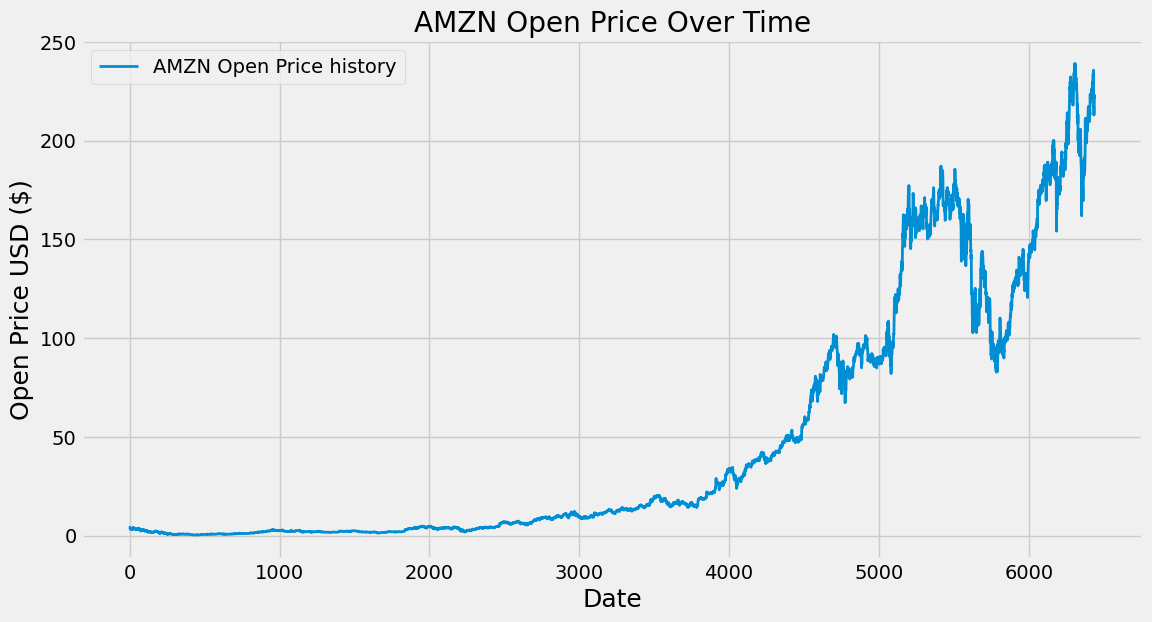

In [25]:
plt.figure(figsize = (12.2, 6.4))
plt.plot(df['Open'], label = f'{stock} Open Price history', linewidth = 2)
plt.title(f'{stock} Open Price Over Time')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Open Price USD ($)', fontsize = 18)
plt.legend(loc = 'upper left')
plt.show()


In [27]:
#MovingAverage
ema100 = df.Close.ewm(span =100, adjust=False).mean()


In [28]:
#MovingAverage
ema200 = df['Close'].ewm(span =200, adjust=False).mean()

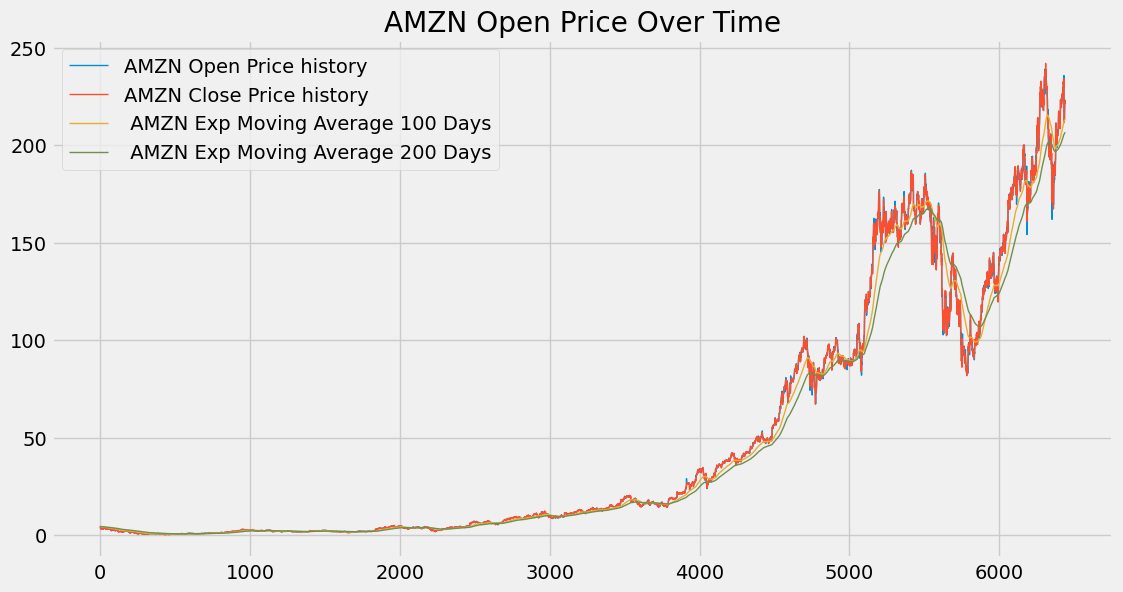

In [31]:
plt.figure(figsize = (12.2, 6.4))
plt.plot(df['Open'], label = f'{stock} Open Price history', linewidth = 1)
plt.plot(df['Close'], label = f'{stock} Close Price history', linewidth = 1)

plt.plot(ema100, label= f' {stock} Exp Moving Average 100 Days', linewidth = 1)
plt.plot(ema200, label= f' {stock} Exp Moving Average 200 Days', linewidth = 1)
plt.title(f'{stock} Open Price Over Time')
plt.legend()
plt.show()


In [32]:
#Training & Testing data
data_traning = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [33]:
data_traning.shape

(4508, 1)

In [34]:
data_testing.shape

(1933, 1)

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [36]:
data_traning_array = scaler.fit_transform(data_traning)

In [38]:
x_train = []
y_train = []

for i in range(100, data_traning_array.shape[0]):
    x_train.append(data_traning_array[i-100:i])
    y_train.append(data_traning_array[i, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)


In [39]:
x_train.shape

(4408, 100, 1)

In [40]:
# Building Sequential Model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential


In [41]:
#LSTM WILL HAVE INPUT AS 3D ARRAY ( batch_size, timesteps, input_dim)


In [42]:
model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [43]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 42s 248ms/step - loss: 0.0190
Epoch 2/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 43s 263ms/step - loss: 0.0023
Epoch 3/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 39s 252ms/step - loss: 0.0021
Epoch 4/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 41s 250ms/step - loss: 0.0020
Epoch 5/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 34s 249ms/step - loss: 0.0017
Epoch 6/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 41s 247ms/step - loss: 0.0019
Epoch 7/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 34s 244ms/step - loss: 0.0018
Epoch 8/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 33s 237ms/step - loss: 0.0020
Epoch 9/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 42s 244ms/step - loss: 0.0019
Epoch 10/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 43s 256ms/step - loss: 0.0014
Epoch 11/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 38s 236ms/step - loss: 0.0014
Epoch 12/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 44s 256ms/step - loss: 0.0017
Epoch 13/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 41s 256ms/step - loss: 0.0016
Epoch 14/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 36s 259ms/step - loss: 0.0015
Epoch 15/50
138

In [47]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
input_data = scaler.fit_transform(final_df)


In [48]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)


In [49]:
y_predicted = model.predict(x_test)

61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step


In [51]:
scaler_factor = 1 / scaler.scale_[0]  # First feature’s scaling factor
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor


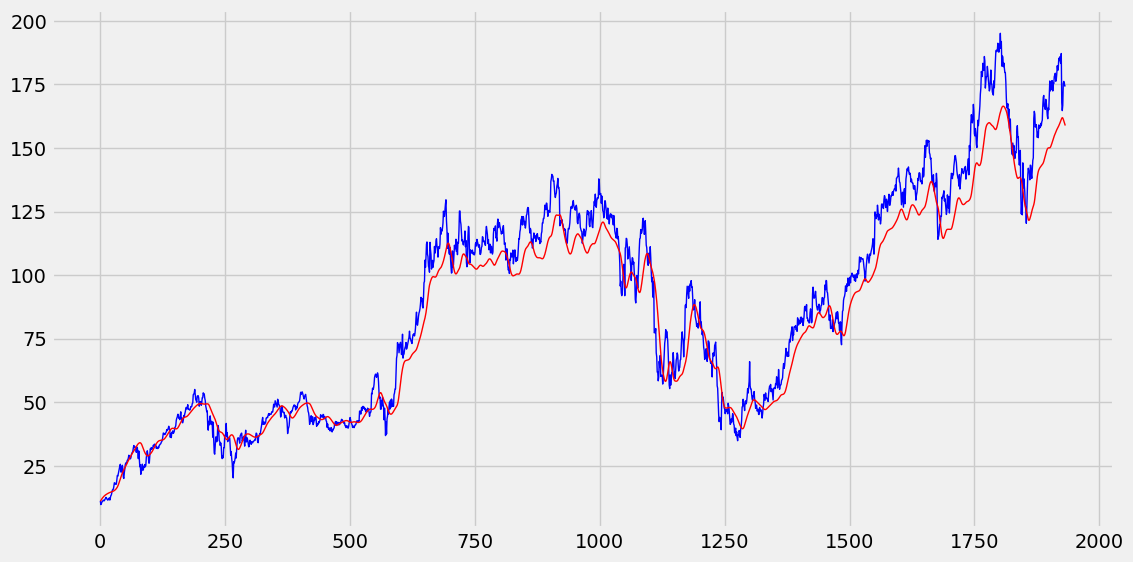

In [52]:
plt.figure(figsize=(12.2, 6.4))
plt.plot(y_test, 'b', label='Original Price', linewidth = 1)
plt.plot(y_predicted, 'r', label='Predicted Price', linewidth = 1)

In [53]:
model.save('AMZN.h5')